# Chapter 8: Dimesionality Reduction

In [1]:
import numpy as np
import pandas as pd
import sklearn 

sklearn.__version__

'1.5.1'

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## The Curse of Dimensionality

More dimensions lead to some counter-intuitive effects. 

A simple example: 
- Average distance between two points in a unit square: ~0.52
- Average distance between two points in a unit cube: ~0.66
- Average distance between two points in a unit 5D hypercube: ~0.8
- Average distance between two points in a unit 1,000,000D hypercube: ~408.25

High dimensional datasets risk being sparse. Instances are further apart from each other, making predictions less reliable.

## Main Approaches for Dimensionality Reduction

### Projection

![Projection](Images/Ch08-Dimensionality_Reduction-Projection.png)

### Manifold Learning

![Manifold](Images/Ch08-Dimensionality_Reduction-Manifold.png)

## PCA

### Preserving the Variance

### Principal Components

In [3]:
# Generate some 3D data
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

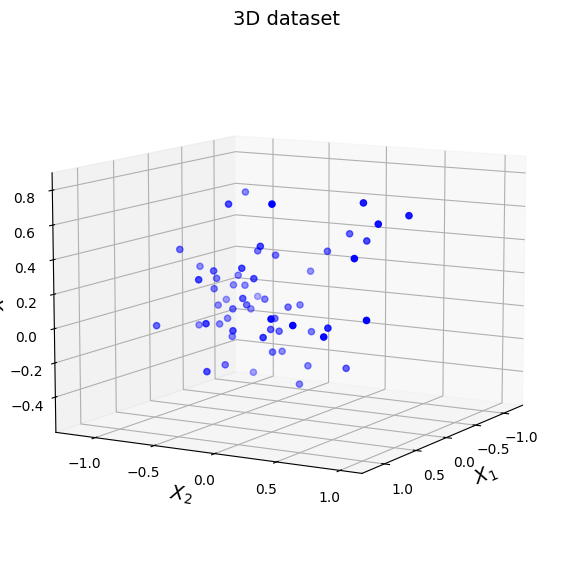

In [4]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='b', marker='o')
ax.view_init(elev=10, azim=30)
ax.set_xlabel('$X_1$', fontsize=14)
ax.set_ylabel('$X_2$', fontsize=14)
ax.set_zlabel('$X_3$', fontsize=14)
plt.title('3D dataset')
plt.tight_layout()

In [5]:
# Data has to be centered around the origin
# Sklearn does this automatically
# When doing it manually, first center data 
X_centered = X - X.mean(axis=0)

U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]

### Projecting Down to d Dimensions

In [6]:
# To project unto the d-dimensional hyperplane
# Compute the matrix W_d containing the first d columns of Vt

W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

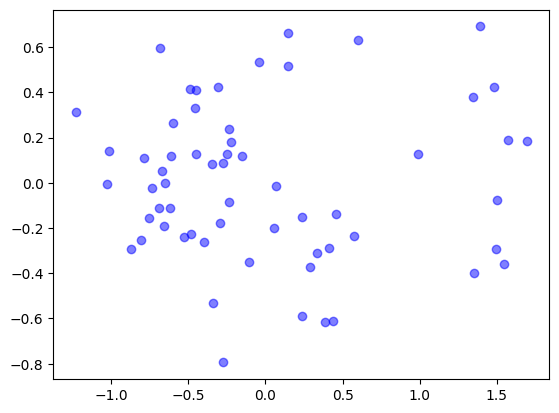

In [7]:
plt.plot(X2D[:, 0], X2D[:, 1], "bo", alpha=0.5)

### Using Scikit-Learn

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

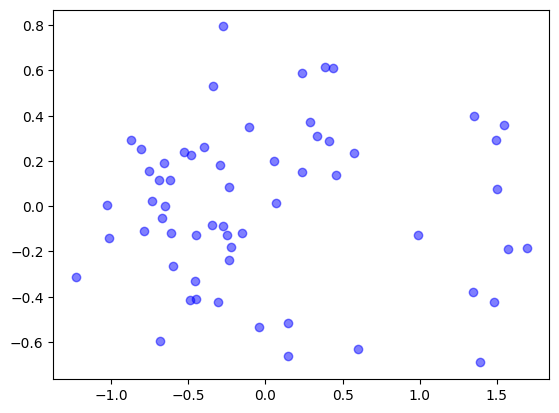

In [9]:
plt.plot(X2D[:, 0], X2D[:, 1], "bo", alpha=0.5)

### Explained Variance Ratio

In [10]:
# How much variance is explained by the first d components?
# In this case d=2

pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

### Choosing the right number of dimensions

In [11]:
# We can choose a variance threshold and find the number of dimensions that preserve that variance
# Example using 95% variance threshold and the MNIST dataset

from sklearn.datasets import fetch_openml

mnists = fetch_openml('mnist_784', as_frame=False)
idx_split = 60000
X_train, y_train = mnists['data'][:idx_split], mnists['target'][:idx_split]
X_test, y_test = mnists['data'][idx_split:], mnists['target'][idx_split:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [12]:
# sklearn's PCA() does it automatically
# Choose n_components to be a float between 0 and 1

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

154

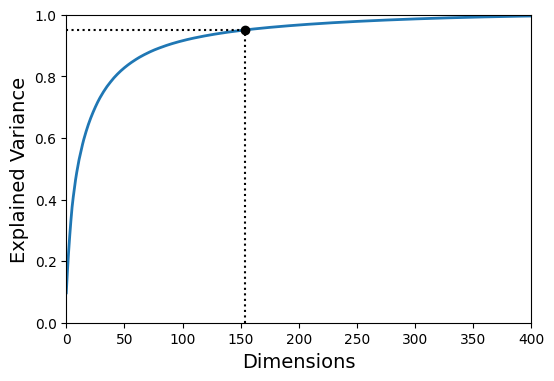

In [13]:
# Plotting the explained variance as a function of the number of dimensions
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=2)
plt.axis([0, 400, 0, 1])
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.plot([d, d], [0, 0.95], 'k:')
plt.plot([0, d], [0.95, 0.95], 'k:')
plt.plot(d, 0.95, 'ko')

In [14]:
# We can use PCA as a preprocessing step for supervised learning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
	PCA(random_state=42),
	RandomForestClassifier(random_state=42)
	)

param_distrib = {
	"pca__n_components": np.arange(10, 80),
	"randomforestclassifier__n_estimators": np.arange(50, 500)
	}

rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=5, random_state=42)
rnd_search.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [15]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 475, 'pca__n_components': 57}

### PCA for Compression

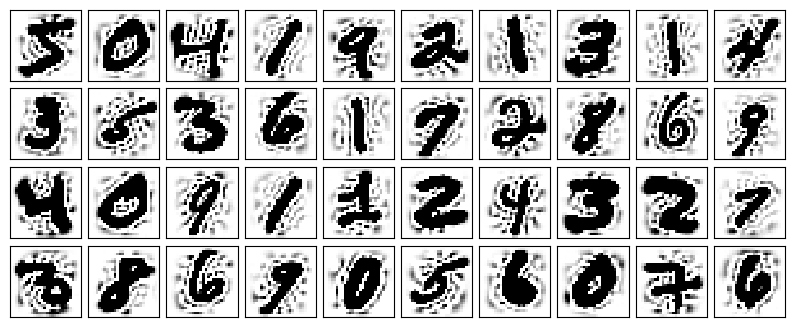

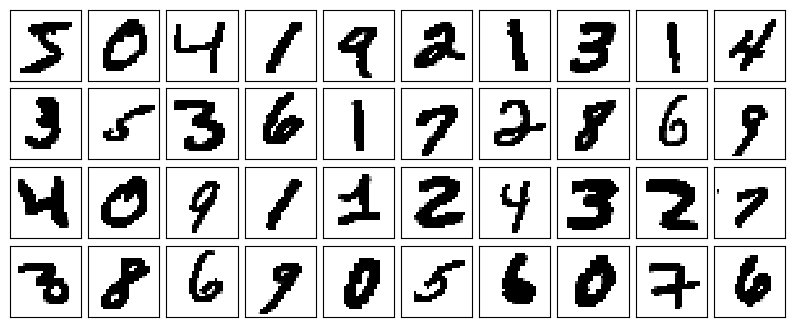

In [16]:
def plot_digits(data):
	fig, axes = plt.subplots(4, 10, figsize=(10, 4),
							 subplot_kw={'xticks':[], 'yticks':[]},
							 gridspec_kw=dict(hspace=0.1, wspace=0.1))
	for i, ax in enumerate(axes.flat):
		ax.imshow(data[i].reshape(28, 28),
				  cmap='binary', interpolation='nearest',
				  clim=(0, 16))
		
plot_digits(pca.inverse_transform(X_reduced))
plot_digits(X_train)

### Randomized PCA

In [17]:
# In this case it uses randomized PCA

rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train) # Same result
rnd_pca.n_components_

154

### Incremental PCA

In [18]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_batches):
	inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [19]:
# Using numpy's memmap class
# This allows to manipulate a large array stored in a binary file on disk as if it were entirely in memory

filename = "data/my_mnist.mmap"

X_mmap = np.memmap(filename, dtype='float32', mode='write', 
				   shape=X_train.shape)

X_mmap[:] = X_train 
X_mmap.flush()

In [20]:
X_mmap = np.memmap(filename, dtype="float32",
mode="readonly").reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

### Random Projection

In [21]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, eps = 5_000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=eps)
d

7300

In [22]:
n = 20_000
np.random.seed(42)

P = np.random.randn(d, n) / np.sqrt(d)
X = np.random.rand(m, n)

X_reduced = X.dot(P.T)

In [23]:
len(X_reduced)

5000

In [24]:
from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps=eps, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X) # same result

In [25]:
## Computationaly complex
# components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)
# X_recovered = X_reduced @ components_pinv.T

In [26]:
# # Comparison

# from sklearn.random_projection import SparseRandomProjection

# print("GaussianRandomProjection fit")
# %timeit GaussianRandomProjection(random_state=42).fit(X)
# print("SparseRandomProjection fit")
# %timeit SparseRandomProjection(random_state=42).fit(X)

# gaussian_rnd_proj = GaussianRandomProjection(random_state=42).fit(X)
# sparse_rnd_proj = SparseRandomProjection(random_state=42).fit(X)
# print("GaussianRandomProjection transform")
# %timeit gaussian_rnd_proj.transform(X)
# print("SparseRandomProjection transform")
# %timeit sparse_rnd_proj.transform(X)

## LLE

In [27]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)

X_unrolled = lle.fit_transform(X_swiss)

Text(0.5, 1.0, 'Unrolled Swiss roll using LLE')

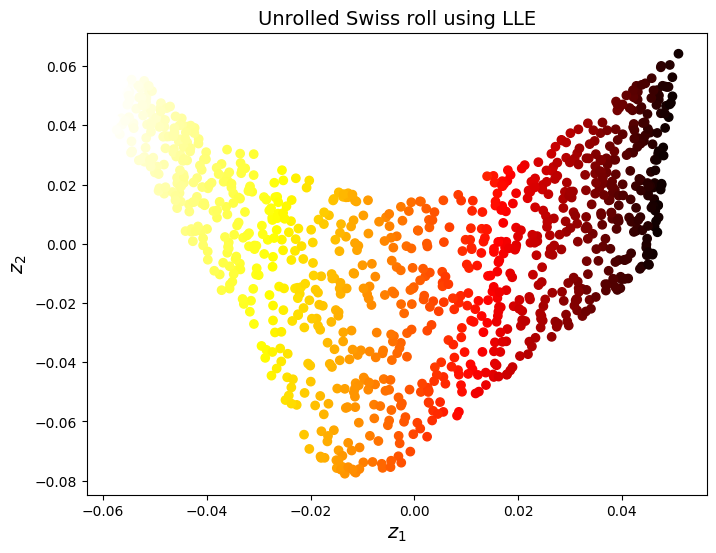

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$")
plt.title("Unrolled Swiss roll using LLE")